Design 4 chips for 4 different Lk (12, 24, 232, 61)pH/sq

In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

# Kinetic inductances definitions

In [3]:
Lk_12 = 12e-12 # For SiTUD20
Lk_24 = 24e-12 # For SiSC10
Lk_61 = 61e-12 # For GeHarry8
Lk_232 = 232e-12 # For SiChip5
epsilon_r_Si = 11.9
epsilon_r_Ge = [15.18, 16, 15.18, 16, 11.9]
thickness_subs_Si = 500e-6
thickness_subs_Ge = [50e-9, 20e-9, 600e-9, 300e-9, 600e-6]


# CPW parameters

In [4]:
# 12pH/sq
FeedlineWidth12 = 30
FeedlineLength12  = 5700
FeedlineGap12 = 5
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Impedance of the bondpad is', impedance_CPW(BondpadWidth12*1e-6, BondpadGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12, length_CPW=(FeedlineLength12 + FeedlineTaperLength12 + BondpadLength12)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.0421104007295 Ohm
Impedance of the bondpad is 50.07757801962502 Ohm
Frequency of the feedline is 6.003855976872581 GHz


In [5]:
# 24pH/sq
FeedlineWidth24 = 50.1
FeedlineLength24  = 5700
FeedlineGap24 = 5
FeedlineTaperLength24 =  100
BondpadWidth24 =  230
BondpadLength24 = 200
BondpadGap24 = 185

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24), 'Ohm')
print('Impedance of the bondpad is', impedance_CPW(BondpadWidth24*1e-6, BondpadGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24, length_CPW=(FeedlineLength24 + FeedlineTaperLength24 + BondpadLength24)*1e-6)/1e9, 'GHz')


Impedance of the feedline is 50.06035358042184 Ohm
Impedance of the bondpad is 50.0888166242714 Ohm
Frequency of the feedline is 5.682366513696933 GHz


In [6]:
# 61pH/sq on Ge!!
FeedlineWidth61 = 87
FeedlineLength61  = 5700
FeedlineGap61 = 5
FeedlineTaperLength61 =  100
BondpadWidth61 =  184
BondpadLength61 = 100
BondpadGap61 = 100

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth61*1e-6, FeedlineGap61*1e-6, epsilon_r_Ge, thickness_subs_Ge, ind_kin_sq=Lk_61), 'Ohm')
print('Impedance of the bondpad is', impedance_CPW(BondpadWidth61*1e-6, BondpadGap61*1e-6, epsilon_r_Ge, thickness_subs_Ge, ind_kin_sq=Lk_61), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth61*1e-6, FeedlineGap61*1e-6, epsilon_r_Ge, thickness_subs_Ge, ind_kin_sq=Lk_61, length_CPW=(FeedlineLength61 + FeedlineTaperLength61 + BondpadLength61)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.08723025799379 Ohm
Impedance of the bondpad is 50.05660330252604 Ohm
Frequency of the feedline is 4.600296503147544 GHz


In [7]:
# 232pH/sq
FeedlineWidth232 = 330
FeedlineLength232  = 5700
FeedlineGap232 = 5
FeedlineTaperLength232 =  100
BondpadWidth232 =  450
BondpadLength232 = 100
BondpadGap232 = 50

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth232*1e-6, FeedlineGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232), 'Ohm')
print('Impedance of the bondpad is', impedance_CPW(BondpadWidth232*1e-6, BondpadGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth232*1e-6, FeedlineGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232, length_CPW=(FeedlineLength232 + FeedlineTaperLength232 + BondpadLength232)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.09872776388761 Ohm
Impedance of the bondpad is 52.172154091646235 Ohm
Frequency of the feedline is 4.880979474744977 GHz


# Resonators list

Resonator 1
 Impedance: 714.0362481936509 Ohm
 Lg: 41.07037436939705 nH
 Cg: 78.86931149424605 fF
 Cc: 1.684879954138959 fF
 Frequency: 2.767016375957114 GHz

Resonator 2
 Impedance: 714.0362481936509 Ohm
 Lg: 41.07037436939705 nH
 Cg: 78.86931149424605 fF
 Cc: 1.684879954138959 fF
 Frequency: 2.767016375957114 GHz



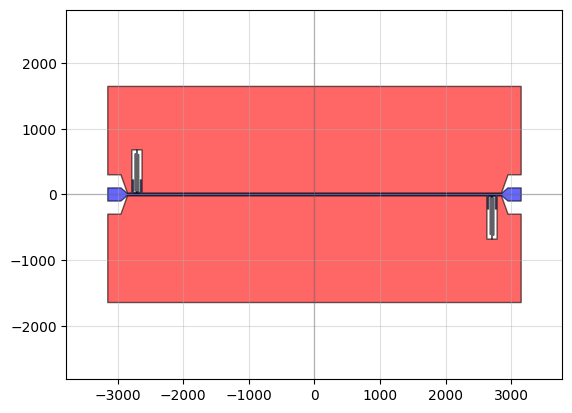

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\test.gds'

In [10]:
# 12pH/sq
SeparationTlineResonator12 = 0
NumberOfResonators12 = 2

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*120
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*200
CapacitorWidth12 = np.ones(NumberOfResonators12)*15

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*50
InductorVerticalLength12 = np.ones(NumberOfResonators12)*11
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*50
InductorEndLength12 = 50*np.ones(NumberOfResonators12)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
InductorWidth12 = np.ones(NumberOfResonators12)*1
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*10
SpacingCc12 = np.ones(NumberOfResonators12)*(-4)
TaperLength12 = np.ones(NumberOfResonators12)*5

for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    print(f' Impedance: {impedance_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12 + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6, 
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)} Ohm')
                                            
    print(f' Frequency: {resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12 + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6, 
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9} GHz')
    print('')


ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, np.max(InductorTotalLength12) + 5*FeedlineWidth12]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\test.gds")
